Question 1: What is Anomaly Detection? Explain its types.

Anomaly Detection refers to identifying data points, events, or patterns that deviate significantly from the expected behavior in a dataset.

Types of Anomalies

1. Point Anomalies
A single data point is abnormal compared to the rest of the dataset.
Example:
During online transactions, a sudden ₹5,00,000 purchase on a card that usually spends < ₹5,000.

2. Contextual Anomalies
A data point is anomalous under specific context (time, season, location).
Example:
Temperature = 15°C is normal in December but anomalous in May.


3. Collective Anomalies
A group/sequence of points behaves abnormally even if individual points are normal.
Example:
A week-long drop in electricity consumption in an industrial zone.

Question 2: Compare Isolation Forest, DBSCAN, LOF

| Method                         | Approach                                                 | Best Use Cases                                | Strengths                     |
| ------------------------------ | -------------------------------------------------------- | --------------------------------------------- | ----------------------------- |
| **Isolation Forest**           | Randomly splits feature space; anomalies isolated faster | High-dimensional numeric data, large datasets | Fast, scalable                |
| **DBSCAN**                     | Density-based clustering; low-density = anomaly          | Spatial data, clusters of arbitrary shape     | Captures arbitrary clusters   |
| **LOF (Local Outlier Factor)** | Compares local density of point w.r.t neighbors          | Local anomalies, noisy datasets               | Detects subtle local outliers |


Question 3: Key Components of a Time Series

Trend
Long-term increasing or decreasing pattern.
Example: AirPassengers count increases year over year.

Seasonality
Repeating patterns at fixed frequencies.
Example: Retail sales spike every December.

Cyclic Component
Irregular cycles >1 year (economy cycles).
Example: Stock market rise/fall patterns.

Random / Noise
Unpredictable fluctuations.
Example: Sudden weather changes affecting crop output.

Question 4: Stationarity — Definition, Testing, Transformation
Definition:

A time series is stationary if its statistical properties (mean, variance, autocorrelation) remain constant over time.

How to Test Stationarity?

ADF Test (Augmented Dickey-Fuller)
p-value < 0.05 ⇒ stationary

KPSS Test
p-value > 0.05 ⇒ stationary

Rolling Mean & Variance Plots
Stable lines indicate stationarity.

Question 5: Differentiate AR, MA, ARIMA, SARIMA, SARIMAX

| Model                     | Structure                    | Usage                             |
| ------------------------- | ---------------------------- | --------------------------------- |
| **AR(p)**                 | Depends on past values       | Predict autoregressive patterns   |
| **MA(q)**                 | Depends on past error terms  | Noise modeling                    |
| **ARIMA(p,d,q)**          | AR + differencing + MA       | Non-seasonal forecasting          |
| **SARIMA(p,d,q)(P,D,Q)m** | ARIMA + seasonality          | Seasonal datasets (AirPassengers) |
| **SARIMAX**               | SARIMA + exogenous variables | Weather + energy forecasting      |


Removed existing AirPassengers.csv
--2025-11-23 08:32:02--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘AirPassengers.csv’

AirPassengers.csv   100%[===================>]   2.13K  --.-KB/s    in 0s      

2025-11-23 08:32:02 (24.7 MB/s) - ‘AirPassengers.csv’ saved [2180/2180]


--- Content of AirPassengers.csv (first 5 lines) ---
"Month","Passengers"
"1949-01",112
"1949-02",118
"1949-03",132
"1949-04",129

--- File size ---
4.0K	AirPassengers.csv


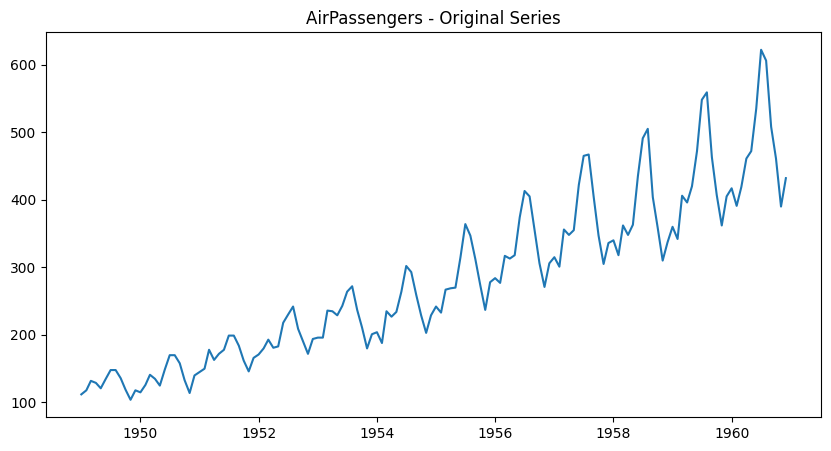

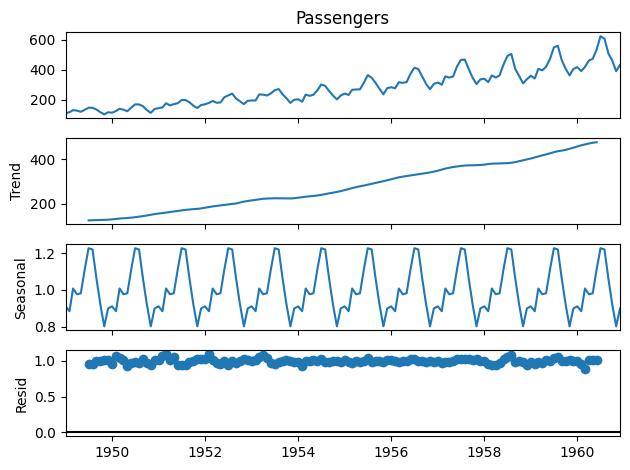

In [9]:
# Question 6: Time Series Decomposition (AirPassengers)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import os

# Ensure the file is fresh by removing it if it exists
if os.path.exists("AirPassengers.csv"):
    os.remove("AirPassengers.csv")
    print("Removed existing AirPassengers.csv")

# Download dataset from a working URL
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv -O AirPassengers.csv

# Inspect the downloaded file
print("\n--- Content of AirPassengers.csv (first 5 lines) ---")
!head -n 5 AirPassengers.csv
print("\n--- File size ---")
!du -h AirPassengers.csv

# Load dataset
data = pd.read_csv("AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.columns = ['Passengers'] # Ensure column name is 'Passengers' as expected later

# Plot Original
plt.figure(figsize=(10,5))
plt.plot(data['Passengers'])
plt.title("AirPassengers - Original Series")
plt.show()

# Decompose
result = seasonal_decompose(data['Passengers'], model='multiplicative')
result.plot()
plt.show()

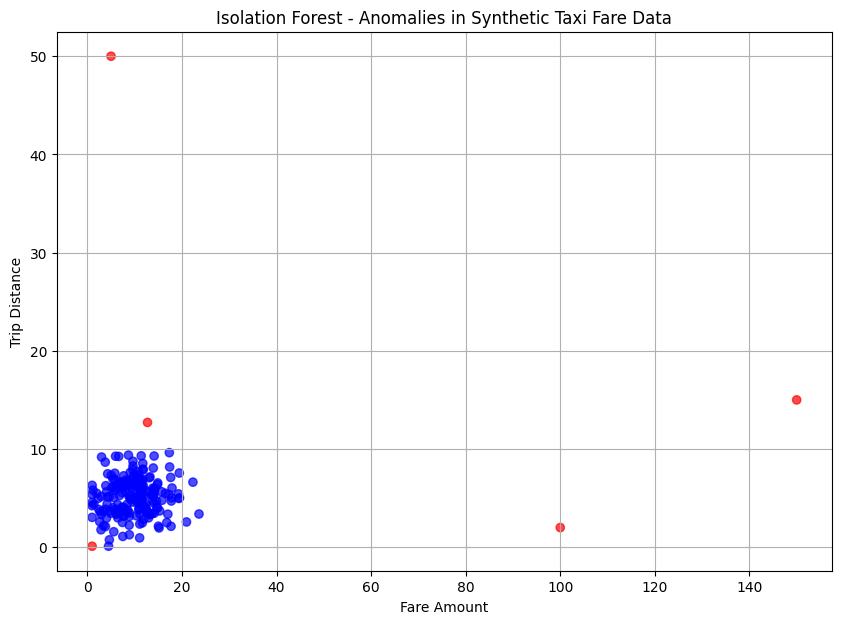

Number of anomalies detected: 5
Detected anomalies (first 5):
     fare_amount  trip_distance  anomaly
9        12.7128      12.705463       -1
200     100.0000       2.000000       -1
201       5.0000      50.000000       -1
202       1.0000       0.100000       -1
203     150.0000      15.000000       -1


In [14]:
# Question 7: Isolation Forest on NYC Taxi Fare
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np

# Generate a synthetic dataset for demonstration purposes
# Simulating fare_amount and trip_distance with some outliers
np.random.seed(42)
data = {
    'fare_amount': np.random.normal(10, 5, 200),
    'trip_distance': np.random.normal(5, 2, 200)
}
df = pd.DataFrame(data)

# Add some clear anomalies
df.loc[200] = [100, 2]  # High fare, short distance
df.loc[201] = [5, 50]   # Low fare, long distance
df.loc[202] = [1, 0.1]  # Very low fare, very short distance (might be an anomaly too)
df.loc[203] = [150, 15] # Very high fare, moderate distance

# Ensure positive values
df['fare_amount'] = df['fare_amount'].apply(lambda x: max(1, x))
df['trip_distance'] = df['trip_distance'].apply(lambda x: max(0.1, x))

# Select numeric features
X = df[['fare_amount', 'trip_distance']]

# Model
iso = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = iso.fit_predict(X)

# Plot
plt.figure(figsize=(10,7))
plt.scatter(df['fare_amount'], df['trip_distance'],
            c=df['anomaly'].map({1:'blue', -1:'red'}), alpha=0.7)
plt.title("Isolation Forest - Anomalies in Synthetic Taxi Fare Data")
plt.xlabel("Fare Amount")
plt.ylabel("Trip Distance")
plt.grid(True)
plt.show()

print("Number of anomalies detected:", (df['anomaly'] == -1).sum())
print("Detected anomalies (first 5):")
print(df[df['anomaly'] == -1].head())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


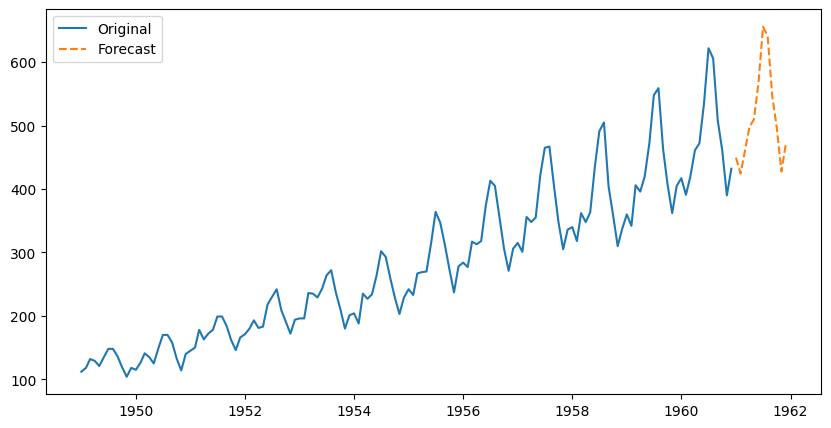

In [15]:
# Question 8: SARIMA Forecasting (AirPassengers)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv("AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Train SARIMA
model = SARIMAX(data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# Forecast next 12 months
forecast = result.predict(start=len(data), end=len(data)+11)

plt.figure(figsize=(10,5))
plt.plot(data['Passengers'], label="Original")
plt.plot(forecast, label="Forecast", linestyle='--')
plt.legend()
plt.show()


Generated synthetic dataset.csv

--- Content of dataset.csv (first 5 lines) ---
value1,value2
5.993428306022466,5.715574720696567
4.72347139765763,6.121569052736469
6.295377076201385,7.166102486350554
8.046059712816051,7.1076041040698055

--- File size ---
8.0K	dataset.csv


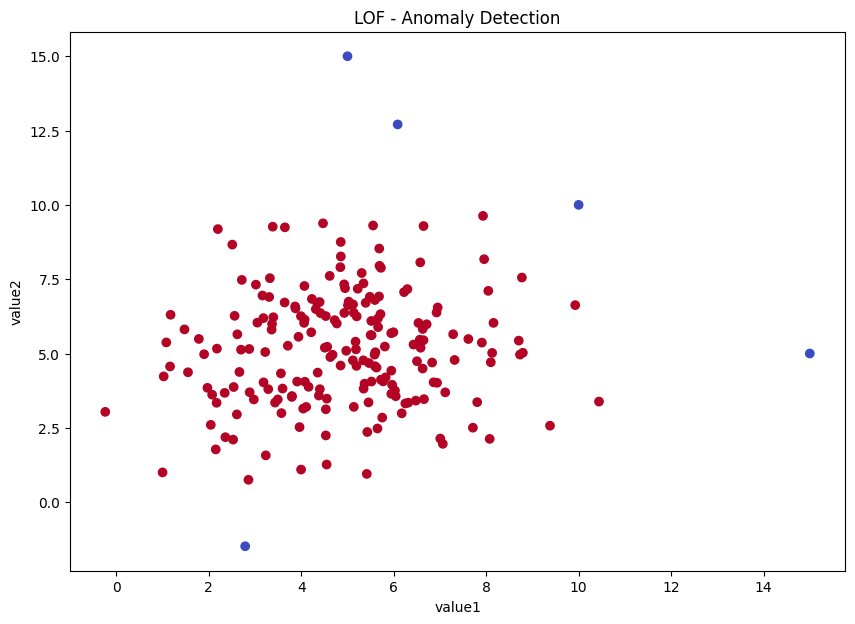

Number of anomalies detected: 5
Detected anomalies (first 5):
        value1     value2
9     6.08512  12.705463
62    2.78733  -1.482535
200  15.00000   5.000000
201   5.00000  15.000000
203  10.00000  10.000000


In [17]:
# Question 9: LOF Anomaly Detection
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import numpy as np
import os

# Generate a synthetic dataset for demonstration purposes
np.random.seed(42)
data = {
    'value1': np.random.normal(5, 2, 200),
    'value2': np.random.normal(5, 2, 200)
}
df_synthetic = pd.DataFrame(data)

# Add some clear outliers
df_synthetic.loc[200] = [15, 5]  # Outlier 1
df_synthetic.loc[201] = [5, 15]  # Outlier 2
df_synthetic.loc[202] = [1, 1]   # Outlier 3
df_synthetic.loc[203] = [10, 10] # Outlier 4

# Save the synthetic dataset to a CSV file
df_synthetic.to_csv("dataset.csv", index=False)
print("Generated synthetic dataset.csv")

# Optional: Inspect the generated file
print("\n--- Content of dataset.csv (first 5 lines) ---")
!head -n 5 dataset.csv
print("\n--- File size ---")
!du -h dataset.csv


df = pd.read_csv("dataset.csv")
X = df[['value1', 'value2']]

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
labels = lof.fit_predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(X['value1'], X['value2'],
            c=labels, cmap='coolwarm') # Use labels directly for coloring outliers (-1)
plt.title("LOF - Anomaly Detection")
plt.xlabel("value1")
plt.ylabel("value2")
plt.show()

print("Number of anomalies detected:", (labels == -1).sum())
print("Detected anomalies (first 5):\n", df[labels == -1].head())

Question 10: Real-Time Data Science Workflow (Energy Grid)
1. Anomaly Detection in Streaming Data

Use models that support online/mini-batch updates:

✔ Isolation Forest (fast, scalable)
✔ LOF (local anomalies in regions)
✔ DBSCAN (clusters of unusual behavior)

Method:

Continuously read 15-min data batches

Preprocess: missing values, normalization

Apply chosen model

Trigger alert if anomaly = -1

2. Forecasting Model (Short-Term)
Use SARIMAX

Because:
✔ seasonal patterns (daily/weekly)
✔ exogenous variables (temperature, weather, region)

3. Validation & Monitoring

RMSE, MAPE tracking

Model drift detection

Retrain every week/month

Real-time dashboards (Grafana / Kibana)

4. Business Value

✔ Predict electricity shortage
✔ Prevent overload & blackouts
✔ Optimize energy purchase
✔ Detect fraud or abnormal consumption
✔ Improve customer billing accuracy